# Q1.

[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[1, 2, 0.5], [1, 0.75, 0.5], [0.5, 0.75, 1.0]]
[[0.5  2.5  3.5  1.5 ]
 [0.5  1.25 2.25 1.5 ]
 [1.   1.75 2.25 1.5 ]]
[[0.5        1.42857143 1.55555556 1.         0.5       ]
 [0.5        0.71428571 1.         1.         0.5       ]
 [1.         1.         1.         1.         1.        ]]


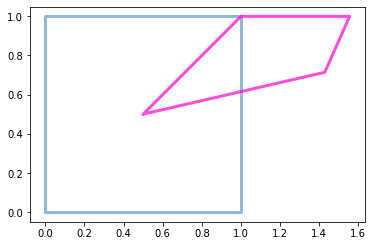

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
# points a, b and, c
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)
# matrix with row vectors of points
P = np.array([a, b, c, d]).T
print(P)
# H = np.identity(3)
# H[0,0] = 2
# H[1,1] = 2
# H[2, 0] = 0.3
# H[2, 1] = 0.5
t = np.pi/3

H = [[np.cos(t), np.sin(t), 0.], [-np.sin(t), np.cos(t), 0.], [0., 0., 1.]] # Rotataion
H = [[1., 0., 0.5], [0.,1., 0.5], [0., 0., 1.]] # translation 
H = [[0.5*np.cos(t), 0.5*np.sin(t), 0.5], [-0.5*np.sin(t), 0.5*np.cos(t), 0.5], [0., 0., 1.]] # similarity
H = [[ 1, 2, 0.5], [ 1 , 0.75, 0.5], [0., 0., 1.]] # Affinity
H = [[ 1, 2, 0.5], [ 1 , 0.75, 0.5], [0.5, 0.75, 1.]] # projetive transformation 

print(H)
Pt = np.matmul(H, P) 
print(Pt)
P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)

x = P[0, :]
y = P[1, :]
Pt = Pt/Pt[-1, :]
Pt = np.insert(Pt,4,Pt[:,0],axis=1)
xt = Pt[0, :]
yt = Pt[1, :]

print(Pt)
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.plot(x, y, color='#6699cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')
ax.plot(xt, yt, color='#ff00cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

# Q2.

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np


im1 = cv.imread('./A02images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./A02images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
#im4 = cv.cvtColor(im4, cv.COLOR_BGR2RGB)
print(np.shape(im1))
print(np.shape(im4))
with open('./A02images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
plt.imshow(im4_warped)
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
plt.imshow(im4_warped)
print(type(im4_warped))
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()



In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

im1 = cv.imread('./A02images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./A02images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('./A02images/graf/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]

print(type(im5))

def img_to_array(img):
    r, c, ch = img.shape
    im_array = np.zeros((c,r, ch), dtype= img.dtype)
    for i in range(r):
        im_array[:,i] = img[i]
    return im_array

def array_to_img(arr):
    r,c,ch = arr.shape
    image = np.zeros((c,r,ch) , dtype=arr.dtype)
    for i in range(c):
        image[i] = arr[:,i]
    return image
def warpPerspective(img, H, size):
    r, c = size
    R, C = img.shape[0], img.shape[1]
    new_img = np.zeros((r,c, img.shape[2]), dtype=img.dtype)
    img_array = img_to_array(img)

    for i in range(r):
        for j in range(c):
            p = np.matmul( np.linalg.inv(H), np.array([i, j ,1]))
            p = p/p[2]
            i1 = int(p[0])
            j1 = int(p[1])
            if (i1 >= 0 and i1 < C) and  (j1 >= 0 and j1 < R):
                new_img[i,j] = img_array[i1, j1]
    new_img = array_to_img(new_img)
    return new_img

im5_warped  = warpPerspective(im5,np.linalg.inv(H), (1000,1000))

#im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


plt.imshow(im5_warped)
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im5)
cv.waitKey(0)
cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# Q3.

In [ ]:
import cv2 as cv
import numpy as np
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1
im1 = cv.imread('./A02images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./A02images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im1copy = im1.copy()
im4copy = im4.copy()
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)
while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)
while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        
        break
cv.destroyAllWindows()
print(p1)
print(p2)

pt1 = np.float32([p1[0], p1[1], p1[2], p1[3]])
pt2 = np.float32([p2[0], p2[1], p2[2], p2[3]])
H = cv.getPerspectiveTransform(pt1, pt2)
print(H)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
print(H)

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)
cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)
cv.destroyAllWindows()

# Q4.

In [ ]:
import cv2 as cv
import numpy as np

def points(img1, img2):
    N = 5
    global n
    n = 0
    p1 = np.empty((N,2))
    p2 = np.empty((N,2))

    # mouse callback function
    def draw_circle(event,x,y,flags,param):
        global n
        p = param[0]
        if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param[1],(x,y),5,(255,0,0),-1)
            p[n] = (x,y)
            n += 1
    img1copy = img1.copy()
    img2copy = img2.copy()
    cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

    param = [p1, img1copy]
    cv.setMouseCallback('Image 1',draw_circle, param)
    while(1):
        cv.imshow("Image 1", img1copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break
    param = [p2, img2copy]
    n = 0
    cv.namedWindow("Image 2", cv.WINDOW_AUTOSIZE)
    cv.setMouseCallback('Image 2',draw_circle, param)
    while(1):
        cv.imshow("Image 2", img2copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break
    cv.destroyAllWindows()
    return p1, p2
def homography_mat(orgP, transP):
    homo = np.zeros((3,3), dtype="float32")
    coe_mat = []
    b = [] 
    for i in range(8):
        k = [0]*8
        if i < 4:
            x,y = orgP[i]
            u,v = transP[i]
            k[0:3] = [x,y,1]
            k[-2:] = -x*u, -y*u
            b.append(u)
        else:
            x,y = orgP[abs(4 - i)]
            u,v = transP[abs(4-i)]
            k[3:6] = [x,y,1]
            k[-2:] = -x*v, -y*v
            b.append(v)
        coe_mat.append(k)
    x = np.linalg.solve(np.array(coe_mat), np.array(b))
    x.resize((9,))
    x[8] = 1
    return x.reshape((3,3))

im1 = cv.imread('./A02images/graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./A02images/graf/img5.ppm', cv.IMREAD_ANYCOLOR)
im3 = cv.imread('./A02images/graf/img3.ppm', cv.IMREAD_ANYCOLOR)

def calling(img1, img2, k):
    p1, p2 = points(img1, img2) 
    orgPnt = np.float32([p1[0], p1[1], p1[2], p1[3]])
    transPnt = np.float32([p2[0], p2[1], p2[2], p2[3]])
    H = homography_mat(orgPnt, transPnt)
    print(H)
    if k == 1:
        img2_warped = cv.warpPerspective(img2, np.linalg.inv(H), (1000,1000))
        img2_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
    else:
        img2_warped = cv.warpPerspective(img2, np.linalg.inv(H), (1500,1500))
        img2_warped[0:img1.shape[0], 0:img1.shape[1]] = img1
    
    cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
    cv.imshow("Image 4 Warped", img2_warped)

    result = img2_warped
    return result
s1 = calling(im1, im3, 1)
s2 = calling(s1, im5,2)

cv.waitKey(0)
cv.destroyAllWindows()